In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pycaret.time_series import *
import logging

mpl.rcParams["figure.dpi"] = 300
plt.style.use("seaborn-whitegrid")


In [2]:
data = pd.read_csv("mauna_loa_co2.csv", index_col="datetime", parse_dates=True)
data.head(10)


CO2
datetime          
1958-03-31  315.70
1958-04-30  317.45
1958-05-31  317.51
1958-06-30  317.25
1958-07-31  315.86
1958-08-31  314.93
1958-09-30  313.21
1958-10-31  312.44
1958-11-30  313.33
1958-12-31  314.67

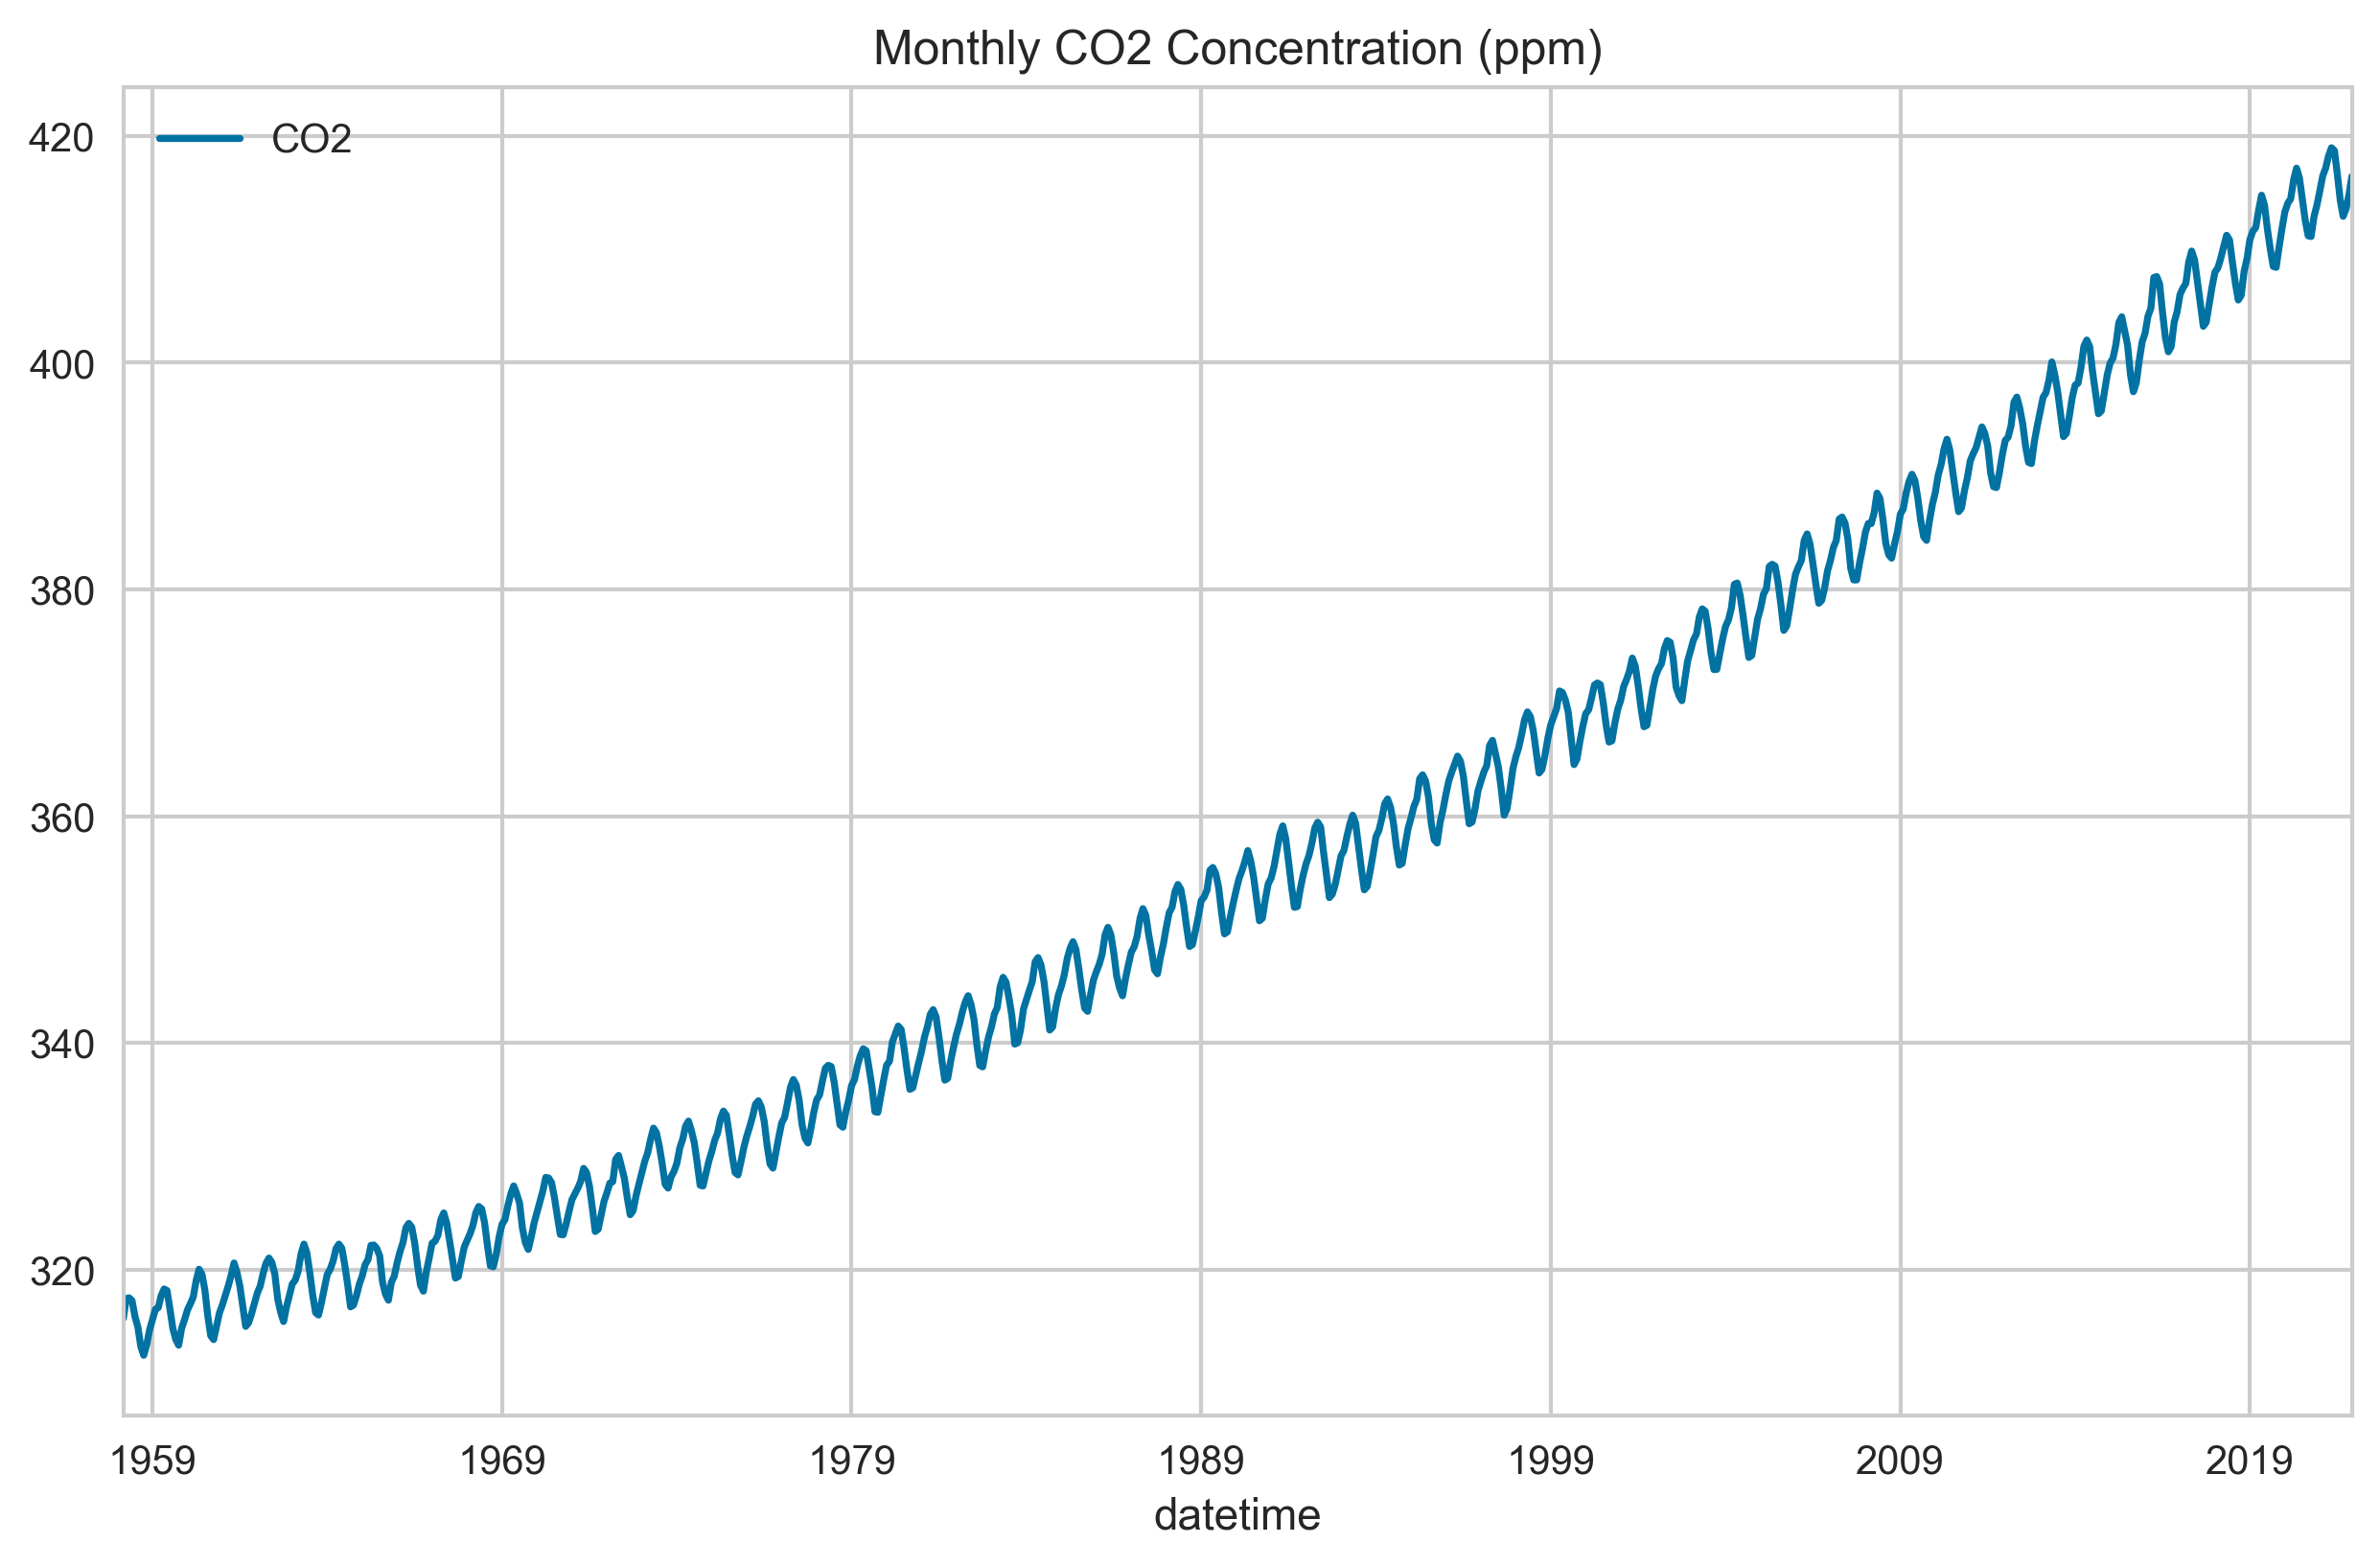

In [3]:
data.plot(figsize=(10, 6))
plt.title("Monthly CO2 Concentration (ppm)")

plt.show()


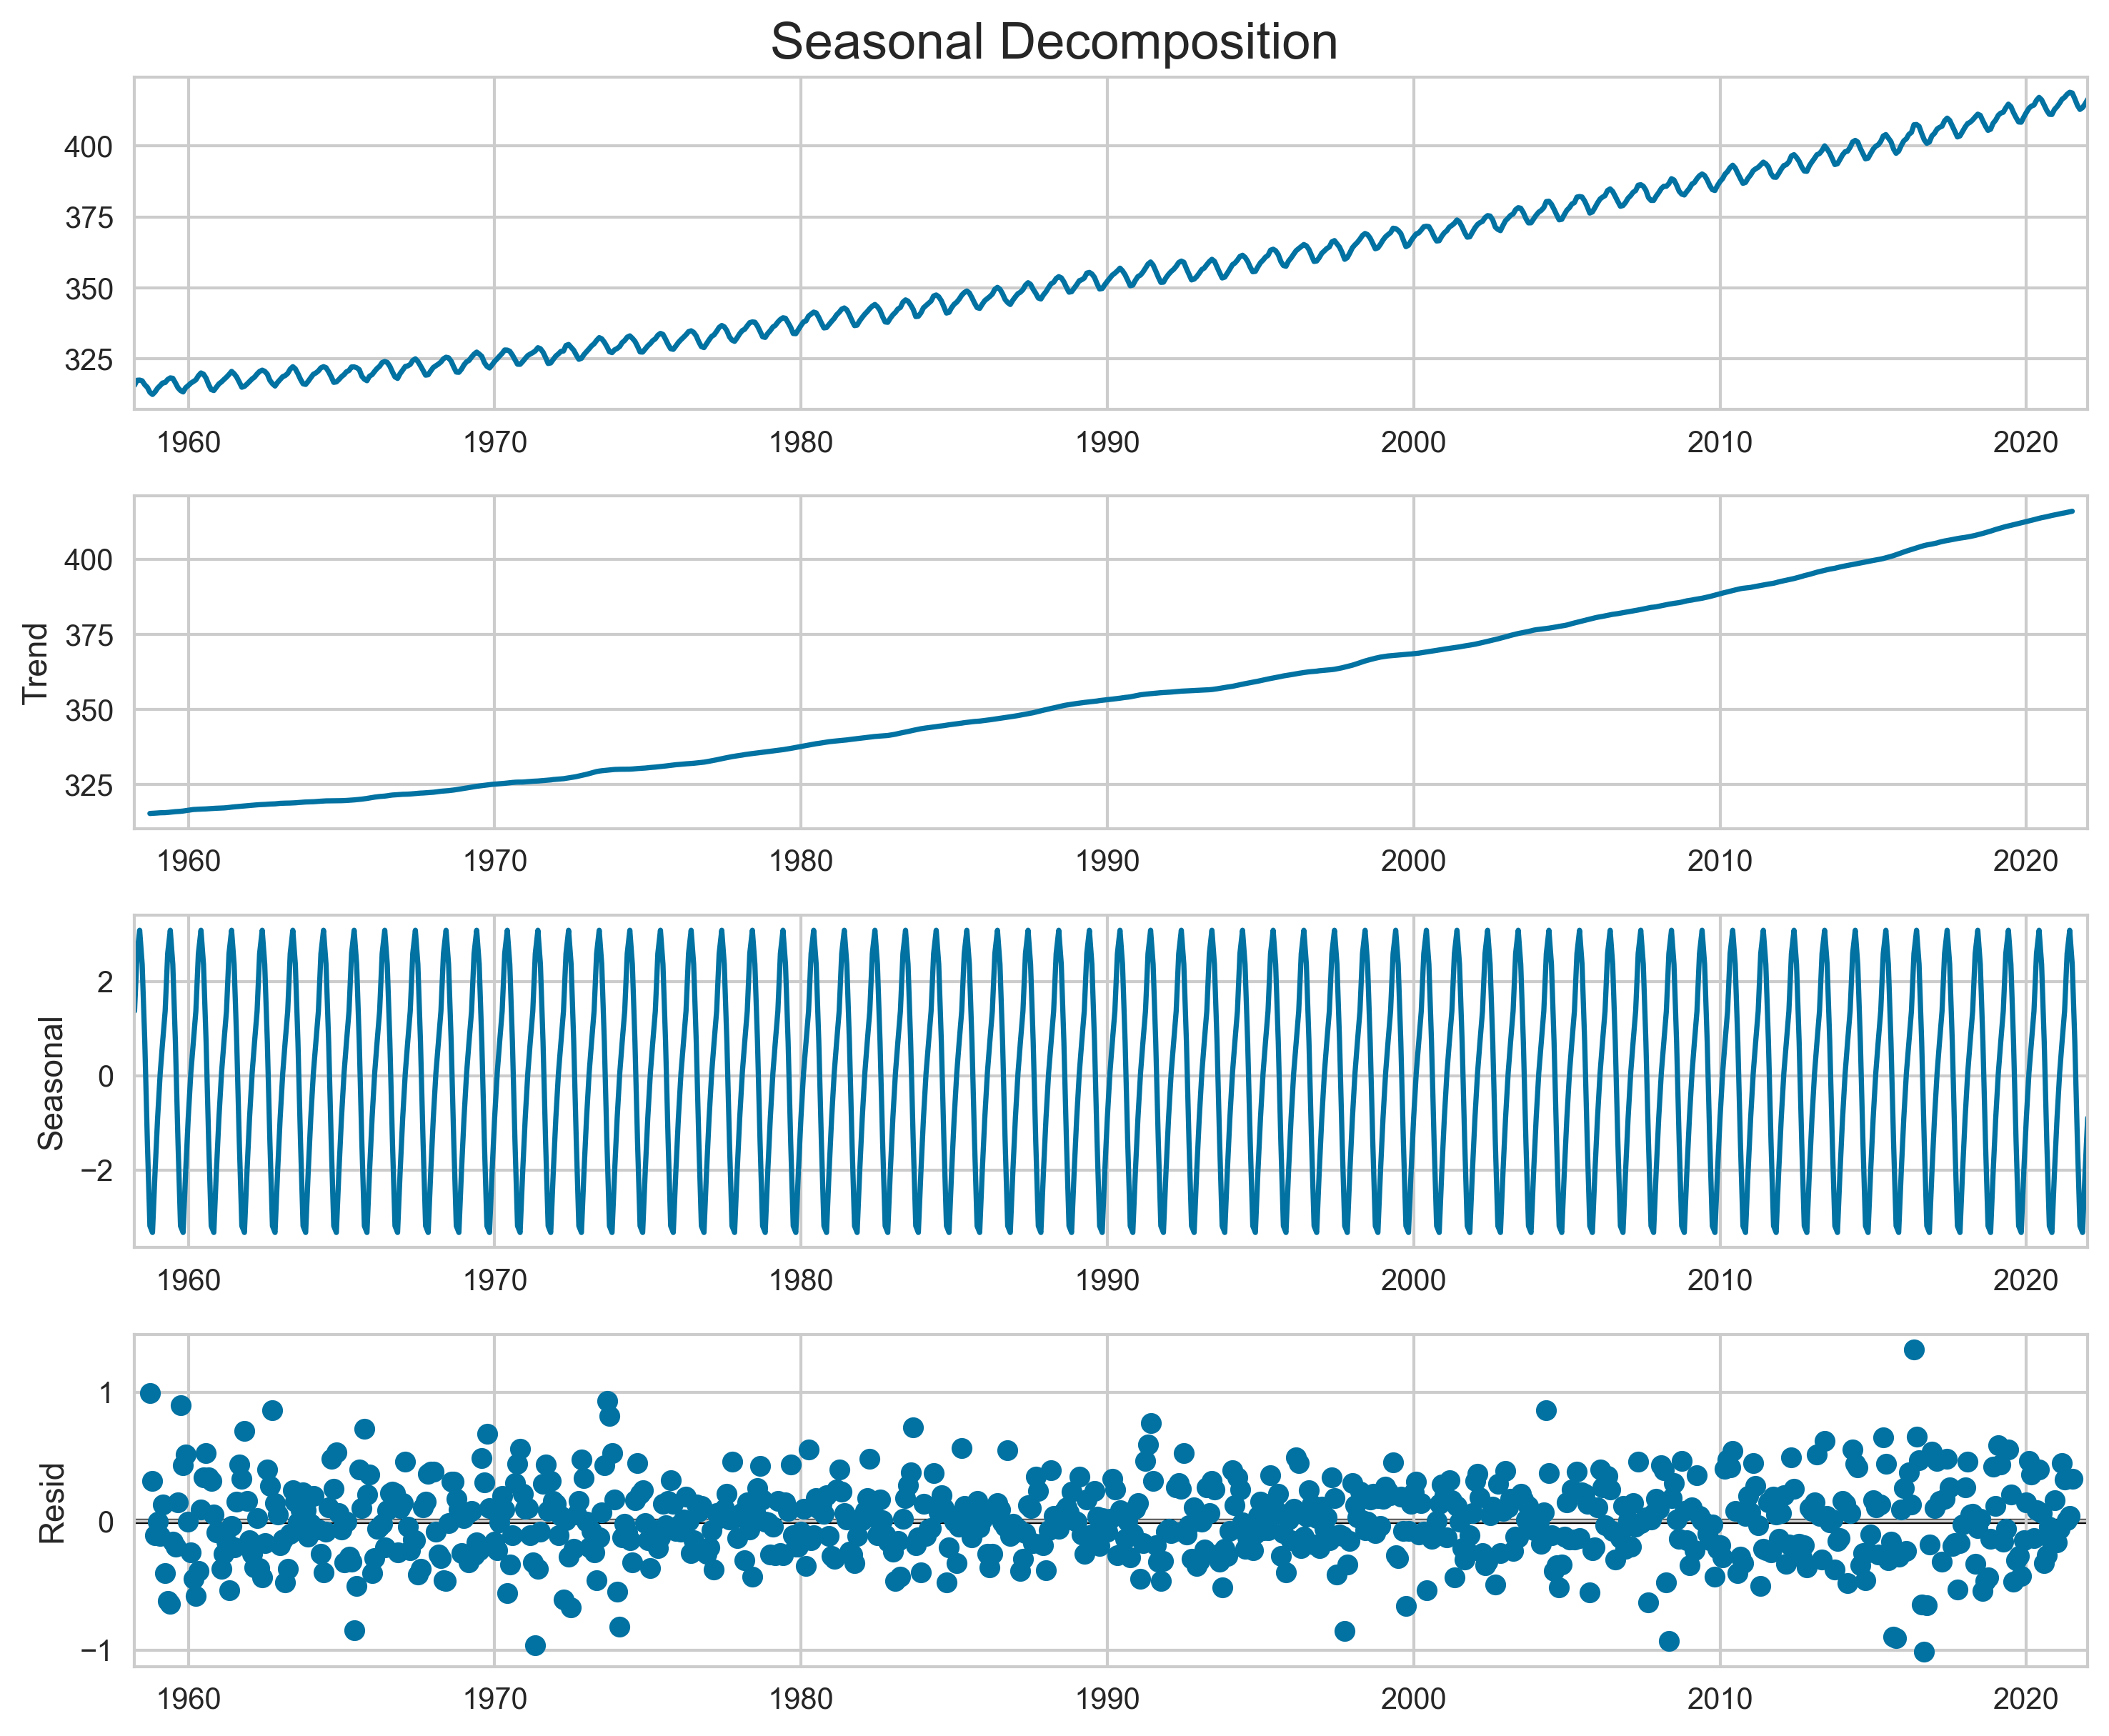

In [4]:
mpl.rcParams["figure.figsize"] = (10, 8)
result = seasonal_decompose(data)

result.plot().suptitle("Seasonal Decomposition", y=1.01, size="x-large")
plt.show()


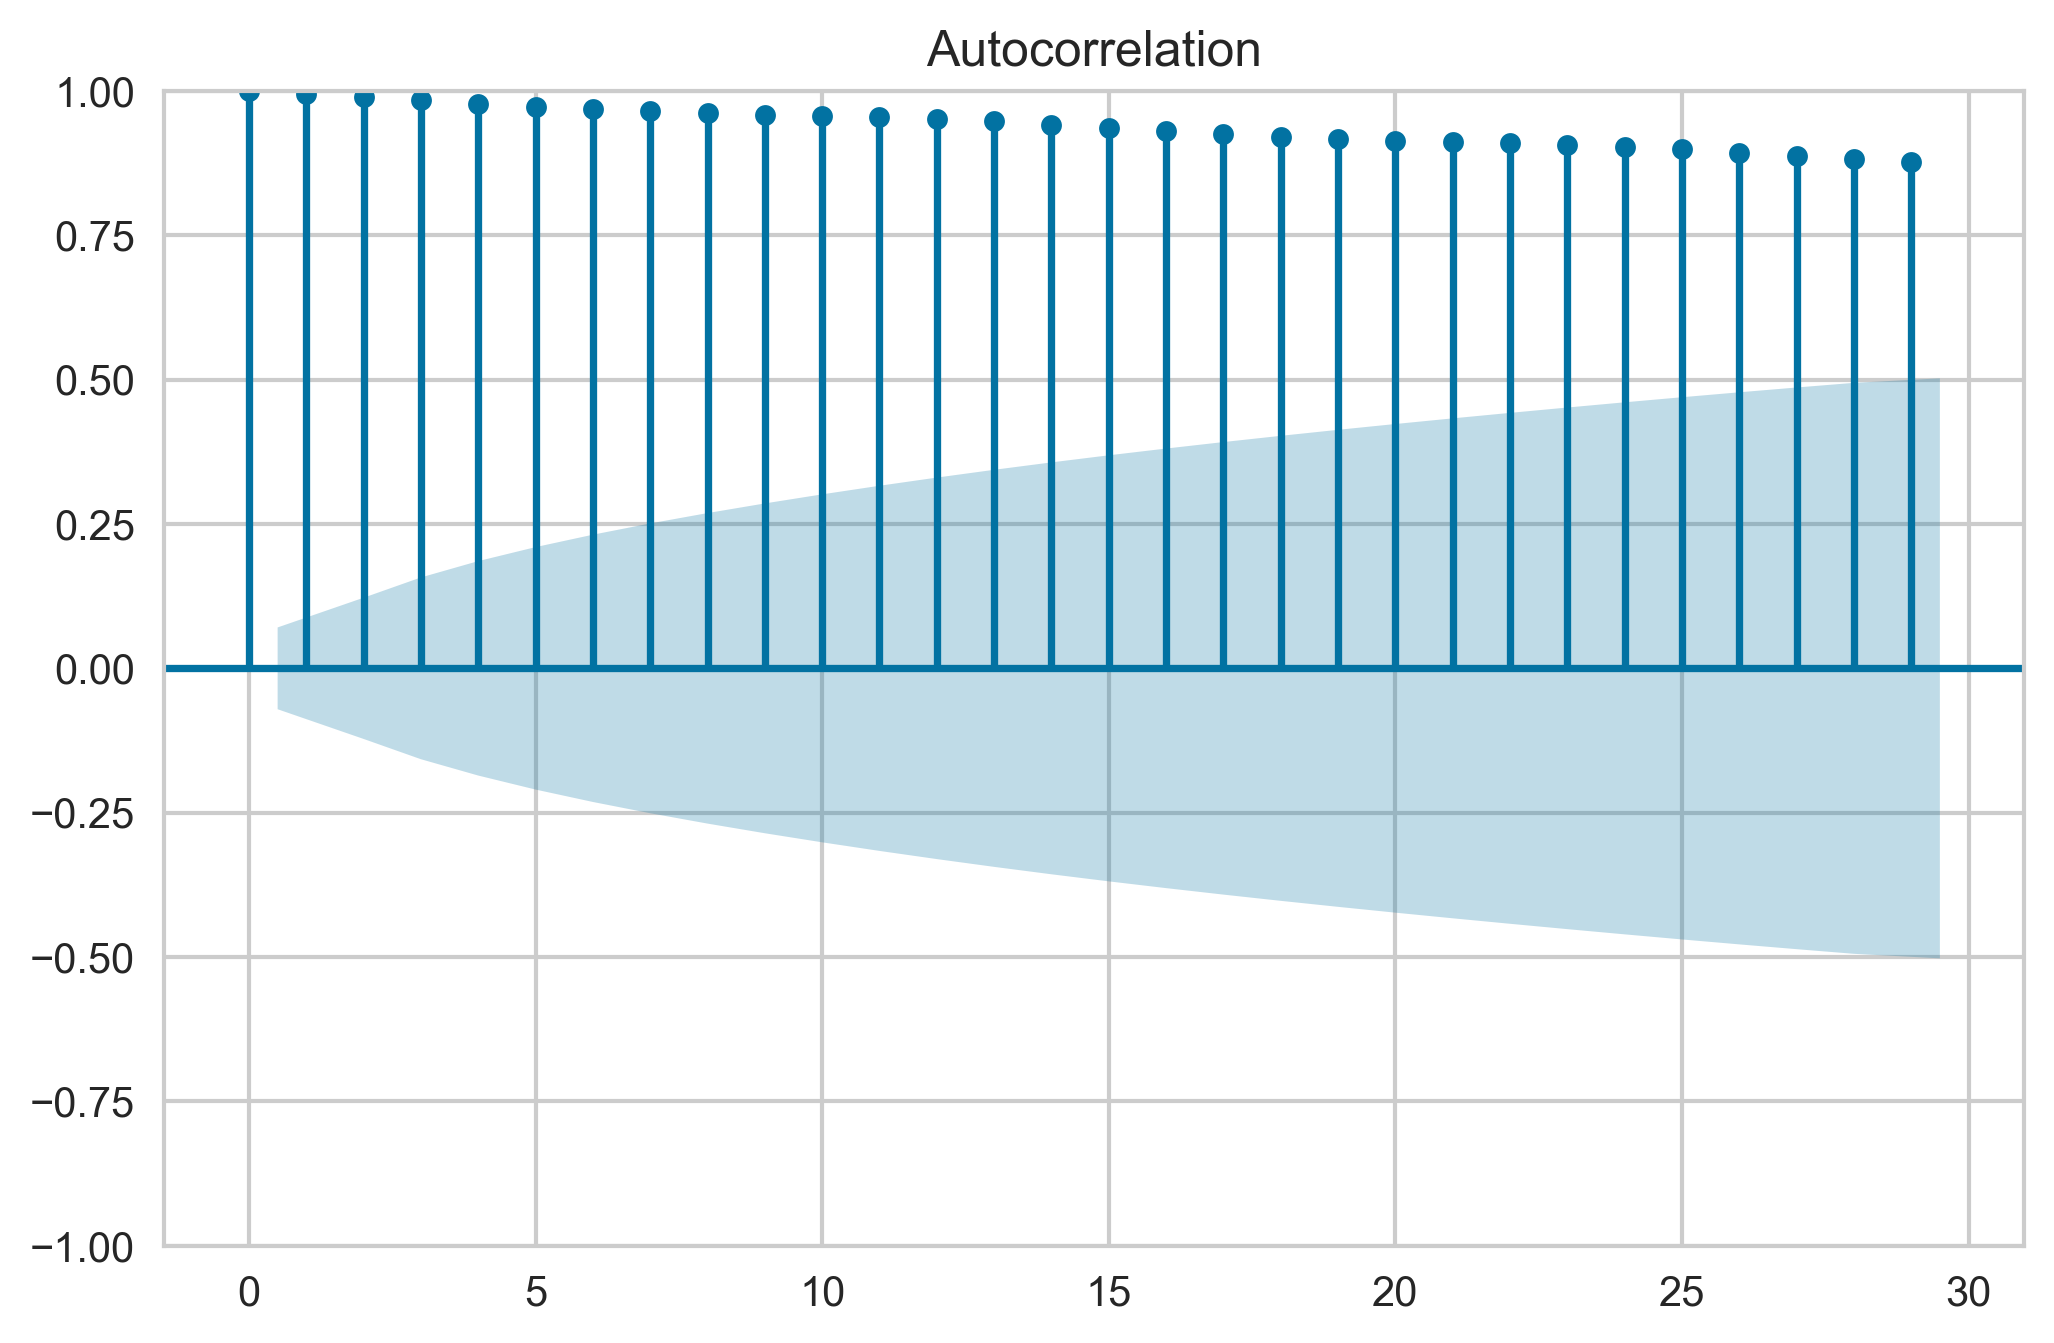

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

plot_acf(data, ax=ax)

plt.show()


In [23]:
ts = setup(data, fh=36, session_id=6501, fig_kwargs={"big_data_threshold": 1000})


In [24]:
check_stats(test="stationarity")


Test Test Name    Data             Property          Setting  \
0   Stationarity       ADF  Actual         Stationarity  {'alpha': 0.05}   
1   Stationarity       ADF  Actual              p-value  {'alpha': 0.05}   
2   Stationarity       ADF  Actual       Test Statistic  {'alpha': 0.05}   
3   Stationarity       ADF  Actual    Critical Value 1%  {'alpha': 0.05}   
4   Stationarity       ADF  Actual    Critical Value 5%  {'alpha': 0.05}   
5   Stationarity       ADF  Actual   Critical Value 10%  {'alpha': 0.05}   
6   Stationarity      KPSS  Actual   Trend Stationarity  {'alpha': 0.05}   
7   Stationarity      KPSS  Actual              p-value  {'alpha': 0.05}   
8   Stationarity      KPSS  Actual       Test Statistic  {'alpha': 0.05}   
9   Stationarity      KPSS  Actual   Critical Value 10%  {'alpha': 0.05}   
10  Stationarity      KPSS  Actual    Critical Value 5%  {'alpha': 0.05}   
11  Stationarity      KPSS  Actual  Critical Value 2.5%  {'alpha': 0.05}   
12  Stationarity      KPSS  Actual    Critical Value 1%  {'alpha': 0.05}   

       Value  
0      False  
1        1.0  
2   5.383263  
3  -3.439158  
4  -2.865427  
5   -2.56884  
6      False  
7       0.01  
8   1.035972  
9      0.119  
10     0.146  
11     0.176  
12     0.216

In [25]:
compare_models(sort="MAPE")


ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

In [43]:
model = create_model("exp_smooth")


In [29]:
fig_kwargs = {
    "renderer": "colab",
    "height": 600,
    "width": 1000,
    "big_data_threshold": 1000,
}
plot_model(model, "forecast", fig_kwargs=fig_kwargs)

# plot_model(model, "forecast")


Mime type rendering requires nbformat>=4.2.0 but it is not installed
When data exceeds a certain threshold (determined by `big_data_threshold`), the renderer is switched to a static one to prevent notebooks from being slowed down.
This renderer may need to be installed manually by users.
Alternately:
Option 1: Users can increase `big_data_threshold` in either `setup` (globally) or `plot_model` (plot specific). Examples.
	>>> setup(..., fig_kwargs={'big_data_threshold': 1000})
	>>> plot_model(..., fig_kwargs={'big_data_threshold': 1000})
Option 2: Users can specify any plotly renderer directly in either `setup` (globally) or `plot_model` (plot specific). Examples.
	>>> setup(..., fig_kwargs={'renderer': 'notebook'})
	>>> plot_model(..., fig_kwargs={'renderer': 'colab'})
Refer to the docstring in `setup` for more details.


In [30]:
fig_kwargs = {"renderer": "jupyterlab", "height": 1000, "width": 1000}

plot_model(model, "diagnostics", fig_kwargs=fig_kwargs)


Mime type rendering requires nbformat>=4.2.0 but it is not installed
When data exceeds a certain threshold (determined by `big_data_threshold`), the renderer is switched to a static one to prevent notebooks from being slowed down.
This renderer may need to be installed manually by users.
Alternately:
Option 1: Users can increase `big_data_threshold` in either `setup` (globally) or `plot_model` (plot specific). Examples.
	>>> setup(..., fig_kwargs={'big_data_threshold': 1000})
	>>> plot_model(..., fig_kwargs={'big_data_threshold': 1000})
Option 2: Users can specify any plotly renderer directly in either `setup` (globally) or `plot_model` (plot specific). Examples.
	>>> setup(..., fig_kwargs={'renderer': 'notebook'})
	>>> plot_model(..., fig_kwargs={'renderer': 'colab'})
Refer to the docstring in `setup` for more details.


In [44]:
model = finalize_model(model)
pred = predict_model(model, fh=36)
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Monthly CO2 Concentration (ppm)")

data[-96:].plot(ax=ax)
pred.plot(ax=ax, color="orange")
ax.legend(["Actual Values", "Forecast"])
plt.show()


In [67]:
save_model(model, "exp_smooth_model")


Transformation Pipeline and Model Successfully Saved


(ExponentialSmoothing(seasonal='mul', sp=12, trend='add'),
 'exp_smooth_model.pkl')